In [128]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [129]:
data = pd.read_csv("https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/selectResidualsFinal_4day_good.csv")


In [130]:
data.head()

,Unnamed: 0,# IndexValue_NDXT,Volume_GOOGL,Volume_AAPL,CPI,High_GOOGL,High_AAPL,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Open_GOOGL,Low_GOOGL,Close/Last_AAPL,Open_AAPL,Low_AAPL
0,1,46.410127,1.412902e+07,1.560337e+08,-0.000120,0.153140,0.861020,-9.833152,51.917671,56.423616,0.147382,1.091445,0.648499,0.861020,1.091445,0.572249
1,2,-42.494476,4.406141e+07,-7.727932e+07,-0.000214,0.695411,-0.294323,-42.558132,-31.447309,-33.093805,0.592061,-0.489279,0.091747,-0.294323,-0.489279,0.185252
2,3,-16.919403,-5.706365e+05,3.928601e+07,-0.000348,-0.716250,-0.308297,-12.242322,-27.617606,-27.179645,-0.780222,-0.241633,-0.547880,-0.308297,-0.241633,-0.505585
3,4,-26.699777,-7.958787e+06,1.786759e+07,-0.000395,-0.460796,-0.310770,-14.854531,-26.439097,-25.133432,-0.606070,-0.256353,-0.495562,-0.310770,-0.256353,-0.295849
4,5,27.341407,4.929442e+05,3.764326e+06,0.143263,-0.215560,0.285895,3.907919,31.104168,25.291570,-0.044289,0.214830,-0.068800,0.285895,0.214830,0.303058


In [131]:
data.shape

(912, 16)

In [132]:
data.columns

Index(['Unnamed: 0', '# IndexValue_NDXT', ' Volume_GOOGL', 'Volume_AAPL',
       'CPI', 'High_GOOGL', 'High_AAPL', ' NetChange_NDXT', ' High_NDXT',
       ' Low_NDXT', ' Close/Last_GOOGL', ' Open_GOOGL', ' Low_GOOGL',
       ' Close/Last_AAPL', ' Open_AAPL', 'Low_AAPL'],
      dtype='object')

In [133]:
df_clean = data.dropna()
for i in data.columns:
    nan_count_column = df_clean[i].isna().sum()
    print("NaN count in column:", nan_count_column)

NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0
NaN count in column: 0


In [134]:
df_clean = df_clean.drop('Unnamed: 0', axis=1)
df_clean.head()


,# IndexValue_NDXT,Volume_GOOGL,Volume_AAPL,CPI,High_GOOGL,High_AAPL,NetChange_NDXT,High_NDXT,Low_NDXT,Close/Last_GOOGL,Open_GOOGL,Low_GOOGL,Close/Last_AAPL,Open_AAPL,Low_AAPL
0,46.410127,1.412902e+07,1.560337e+08,-0.000120,0.153140,0.861020,-9.833152,51.917671,56.423616,0.147382,1.091445,0.648499,0.861020,1.091445,0.572249
1,-42.494476,4.406141e+07,-7.727932e+07,-0.000214,0.695411,-0.294323,-42.558132,-31.447309,-33.093805,0.592061,-0.489279,0.091747,-0.294323,-0.489279,0.185252
2,-16.919403,-5.706365e+05,3.928601e+07,-0.000348,-0.716250,-0.308297,-12.242322,-27.617606,-27.179645,-0.780222,-0.241633,-0.547880,-0.308297,-0.241633,-0.505585
3,-26.699777,-7.958787e+06,1.786759e+07,-0.000395,-0.460796,-0.310770,-14.854531,-26.439097,-25.133432,-0.606070,-0.256353,-0.495562,-0.310770,-0.256353,-0.295849
4,27.341407,4.929442e+05,3.764326e+06,0.143263,-0.215560,0.285895,3.907919,31.104168,25.291570,-0.044289,0.214830,-0.068800,0.285895,0.214830,0.303058


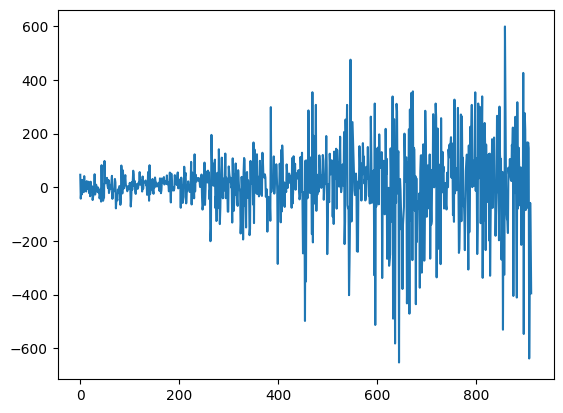

In [135]:
tVals = np.arange(0, 912, 1)
# plt.figure(figsize=(10, 5))
plt.plot(tVals, df_clean['# IndexValue_NDXT'])

In [136]:
scaler = StandardScaler()

In [137]:
data_t = df_clean.transpose()
scaled_data_t = scaler.fit_transform(df_clean)
scaled_data = scaled_data_t.transpose()

print(scaler.mean_)

[ 7.87627022e+00 -3.98516555e+05 -1.12227785e+06  3.06999288e-03
  1.31137607e-01  1.62954529e-01  2.19977101e+00  6.68795157e+00
  7.38898561e+00  1.38659276e-01  1.62583088e-01  1.39073195e-01
  1.62954529e-01  1.62583088e-01  1.45842184e-01]


In [138]:
scaled_data.mean(axis=1)

array([-3.89551938e-18, -2.33731163e-17, -2.33731163e-17, -7.79103877e-18,
        7.79103877e-18,  0.00000000e+00, -1.36343178e-17, -7.79103877e-18,
        2.33731163e-17,  1.55820775e-17, -1.16865582e-17, -7.79103877e-18,
        0.00000000e+00, -1.16865582e-17,  3.89551938e-18])

In [139]:
scaled_data.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [140]:
scaled_data = scaled_data.transpose()


In [141]:
scaled_data.shape

(912, 15)

In [142]:
def create_dataset(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, :])  # 10 timesteps, 15 features
        y.append(data[i + look_back, :])   # Predict the value of the next timestep
    return np.array(X), np.array(y)

In [143]:
# training_set, test_set = train_test_split(scaled_data, test_size=0.2)
# X_train, y_train = training_set, training_set
# X_test, y_test = test_set, test_set

# Assume scaled_data is a NumPy array or pandas Series/DataFrame
split_index = int(len(scaled_data) * 0.8)
training_set = scaled_data[:split_index]
test_set = scaled_data[split_index:]

# X_train, y_train = training_set, training_set
# X_test, y_test = test_set, test_set
X_train, y_train = create_dataset(training_set, look_back=100)
X_test, y_test = create_dataset(test_set, look_back=100)

In [144]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((629, 100, 15), (83, 100, 15), (629, 15), (83, 15))

LSTM: subchunk data to predict the future

Imagine if have one time seires, want to make subsets, then this is what rest of subset looks like

More meaningful than just taking 10 timesteps to make predictions

The 10 below not meaningful

Missing recurrence itself!

Want a NN for sequence to sequence regression

The only thing is the structure of the input data!!

In [145]:
from keras import layers
def create_lstm_model_old(input_shape):

  model = Sequential([
    # missing a folding of the time series, but how i want to do that?
    # but want to fold into pieces of time seires --> give an additional dimension! but, how do we then add this into the 1st layer of the LSTM?
    LSTM(50, activation='tanh', return_sequences=True, input_shape=input_shape),  # 10 timesteps, 15 "features" -- maybe missing a dimension??
    LSTM(40, activation='tanh', return_sequences=True),
    LSTM(30, activation='tanh', return_sequences=True),
    TimeDistributed(Dense(15))  # Output: (batch_size, timesteps, 1) # predicting one step at a time, not what we want
    ])

  return model

def create_lstm_model(input_shape):
    """
    Creates an LSTM-based neural network model for time series forecasting.

    Args:
        input_shape (tuple): The shape of the input data (time steps, features).

    Returns:
        tf.keras.Model: A compiled LSTM model.
    """
    model = Sequential([
        # Input layer
        layers.InputLayer(input_shape=input_shape),

        # LSTM layer 1
        layers.LSTM(units=64, return_sequences=True, activation='relu'),  # Increased units
        layers.Dropout(0.2),

        # LSTM layer 2
        layers.LSTM(units=64, return_sequences=False, activation='relu'), # Added another LSTM layer
        layers.Dropout(0.2),

        # Dense layer 1
        layers.Dense(units=32, activation='relu'), # Added a Dense Layer
        layers.Dropout(0.2),

        # Output layer
        layers.Dense(units=15)  # Predict the next 15 time steps
    ])

    # Compile the model
    return model

def prepare_data(data, n_steps_in, n_steps_out):
    """
    Prepares the data for the LSTM model.

    Args:
        data (np.ndarray): The time series data.
        n_steps_in (int): The number of time steps to look back.
        n_steps_out (int): The number of time steps to predict.

    Returns:
        tuple: A tuple containing X and y, the input and output sequences.
    """
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        seq_x = data[i:i + n_steps_in]
        seq_y = data[i + n_steps_in:i + n_steps_in + n_steps_out]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
input_shape = (10, 15)
model = create_lstm_model(input_shape)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 10, 64)         │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,079 (219.06 KB)

 Trainable params: 56,079 (219.06 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [147]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [148]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 10, 64)         │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,079 (219.06 KB)

 Trainable params: 56,079 (219.06 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:
X_train.shape

(629, 100, 15)

In [150]:
training = model.fit(x=X_train, y=y_train,
                     validation_split=0.1, epochs=50, batch_size=10, verbose=1, callbacks=[mc])
#                     callbacks=[es, mc])

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.7247
Epoch 1: val_loss improved from inf to 1.70963, saving model to best_model.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 0.7255 - val_loss: 1.7096
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.8197
Epoch 2: val_loss improved from 1.70963 to 1.70859, saving model to best_model.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.8189 - val_loss: 1.7086
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.7899
Epoch 3: val_loss did not improve from 1.70859
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.7895 - val_loss: 1.7101
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.8143
Epoch 4: val_loss did not improve from 1.70859
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.8135 - val_loss: 1.7091
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.6890
Epoch 5: val_loss did not improve from 1.70859
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.6903 - val_loss: 

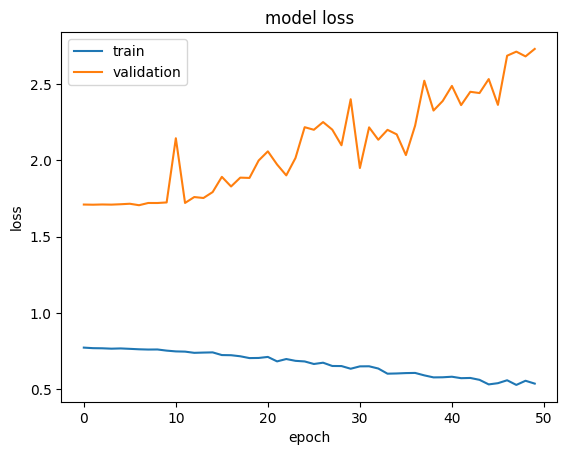

In [169]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# plt.ylim(0, 5)
plt.show()

In [152]:
scaled_data.shape

(912, 15)

In [153]:
# model.predict(input_seq, verbose=0)

### Forecasting

In [156]:
future_predictions = []

# Initial input sequence is the last 10 timesteps
look_back = 10
last_sequence = scaled_data[-look_back:]  # Shape: (10, 15)
input_seq = last_sequence.reshape(1, look_back, 15)  # Shape: (1, 10, 15)

for _ in range(20):  # 80 day forecast - data sampled every four days, so 20 time steps total
    # Predict the next value
    next_pred = model.predict(input_seq, verbose=0)[0, -1]  # Get the last timestep's prediction (1 feature output)
    future_predictions.append(next_pred)

    # Update the input sequence: remove the oldest data, append the new predicted value
    # Correct reshaping: Repeat the predicted value to match the 15 features
    next_pred_reshaped = np.repeat(next_pred, 15).reshape(1, 1, 15)  # Repeat for 15 features

    # Now, concatenate the predicted value to the input sequence
    input_seq = np.concatenate((input_seq[:, 1:, :], next_pred_reshaped), axis=1)  # Slide window forward


# After the loop, future_predictions will contain the next 30 predicted values


In [157]:
# importing data to get dates
dataActualNotResidual = pd.read_csv("https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/processed_data_4day.csv")

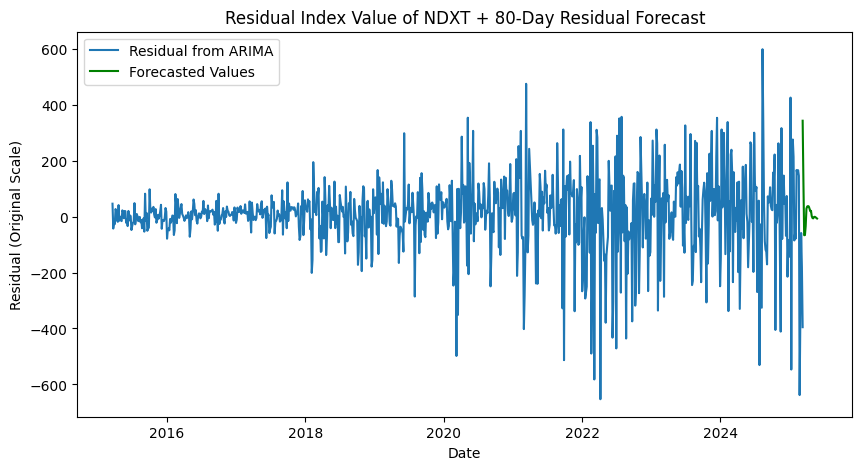

In [170]:
# Prepare the future predictions for inverse transformation (fill remaining features with zeros)
future_predictions_full = np.zeros((len(future_predictions), 15))  # Create an array of shape (30, 15)

# Fill the first column (the predicted stock price) with the actual predictions
future_predictions_full[:, 0] = future_predictions

# Now apply inverse transformation
future_predictions_scaled = scaler.inverse_transform(future_predictions_full)

# Extract only the stock price predictions (first feature)
future_predictions_original = future_predictions_scaled[:, 0]

# Plot the predictions
import matplotlib.pyplot as plt

# tValues = np.arange(0, 912, 1)
tValues = dataActualNotResidual['Date'][1:]
tValues = pd.to_datetime(tValues)
# tValuesPredict = np.arange(912, 912 + len(future_predictions_original), 1)
date_rng = pd.date_range(start = dataActualNotResidual['Date'].max(), end = ('2025-05-29'), freq = '4D')
tValuesPredict = date_rng
tValuesPredict = pd.to_datetime(tValuesPredict)

plt.figure(figsize=(10, 5))
plt.plot(tValues, df_clean['# IndexValue_NDXT'], label ='Residual from ARIMA')
plt.plot(tValuesPredict, future_predictions_original, label="Forecasted Values", color='green')
plt.title("Residual Index Value of NDXT + 80-Day Residual Forecast")
plt.xlabel("Date")
# plt.xlim(2200, 2515+ len(future_predictions_original))
plt.ylabel("Residual (Original Scale)")
plt.legend()
plt.show()


In [171]:
saveForecast = {'Date': tValuesPredict, 'Residual': future_predictions_original}
saveForecast = pd.DataFrame(saveForecast)
saveForecast.to_csv('forecast.csv')

### Monkey brain:

remove last twenty points in data, run LSTM predict again

In [172]:
future_predictions = []

# Initial input sequence is the last 10 timesteps
look_back = 10
scaled_data_new = scaled_data[:-20]
last_sequence = scaled_data_new[-look_back:]  # Shape: (10, 15)
input_seq = last_sequence.reshape(1, look_back, 15)  # Shape: (1, 10, 15)

for _ in range(20):  # 80 day forecast - data sampled every four days, so 20 time steps total
    # Predict the next value
    next_pred = model.predict(input_seq, verbose=0)[0, -1]  # Get the last timestep's prediction (1 feature output)
    future_predictions.append(next_pred)

    # Update the input sequence: remove the oldest data, append the new predicted value
    # Correct reshaping: Repeat the predicted value to match the 15 features
    next_pred_reshaped = np.repeat(next_pred, 15).reshape(1, 1, 15)  # Repeat for 15 features

    # Now, concatenate the predicted value to the input sequence
    input_seq = np.concatenate((input_seq[:, 1:, :], next_pred_reshaped), axis=1)  # Slide window forward


# After the loop, future_predictions will contain the next 30 predicted values

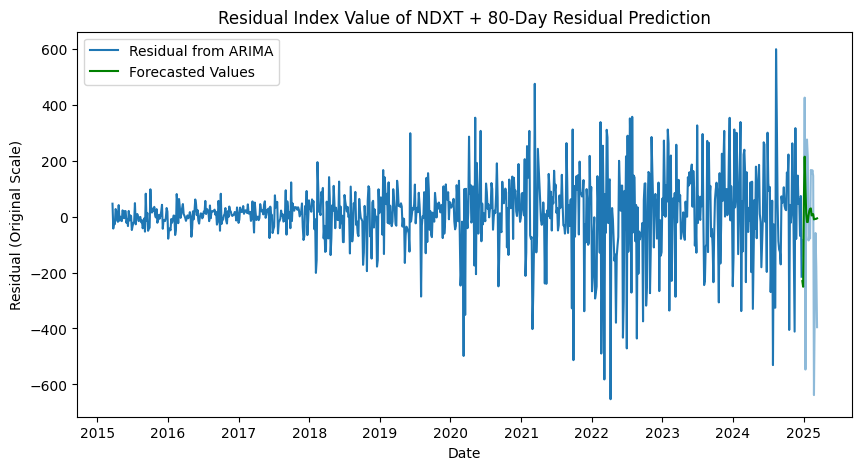

In [177]:
# Prepare the future predictions for inverse transformation (fill remaining features with zeros)
future_predictions_full = np.zeros((len(future_predictions), 15))  # Create an array of shape (30, 15)

# Fill the first column (the predicted stock price) with the actual predictions
future_predictions_full[:, 0] = future_predictions

# Now apply inverse transformation
future_predictions_scaled = scaler.inverse_transform(future_predictions_full)

# Extract only the stock price predictions (first feature)
future_predictions_original = future_predictions_scaled[:, 0]

# Plot the predictions
import matplotlib.pyplot as plt

# tValues = np.arange(0, 912, 1)
tValues = dataActualNotResidual['Date'][1:-20]
tValues = pd.to_datetime(tValues)
# tValuesPredict = np.arange(912, 912 + len(future_predictions_original), 1)
date_rng = dataActualNotResidual['Date'][-20:]
tValuesPredict = date_rng
tValuesPredict = pd.to_datetime(tValuesPredict)

plt.figure(figsize=(10, 5))
plt.plot(tValues, df_clean['# IndexValue_NDXT'][:-20], label ='Residual from ARIMA', color="tab:blue")
plt.plot(tValuesPredict, df_clean['# IndexValue_NDXT'][-20:], color="tab:blue", alpha = 0.50)
plt.plot(tValuesPredict, future_predictions_original, label="Forecasted Values", color='green')
plt.title("Residual Index Value of NDXT + 80-Day Residual Prediction")
plt.xlabel("Date")
# plt.xlim(2200, 2515+ len(future_predictions_original))
plt.ylabel("Residual (Original Scale)")
plt.legend()
plt.show()


In [179]:
dataPredictedARIMA = pd.read_csv("https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/predicted_data.csv")
dataPredictedARIMA.columns

Index(['Unnamed: 0', 'Date', 'last_20_pred'], dtype='object')

In [180]:
Last20Pred = dataPredictedARIMA['last_20_pred'][-20:]

In [181]:
TotalPred_ARIMA_LSTM = Last20Pred + future_predictions_original

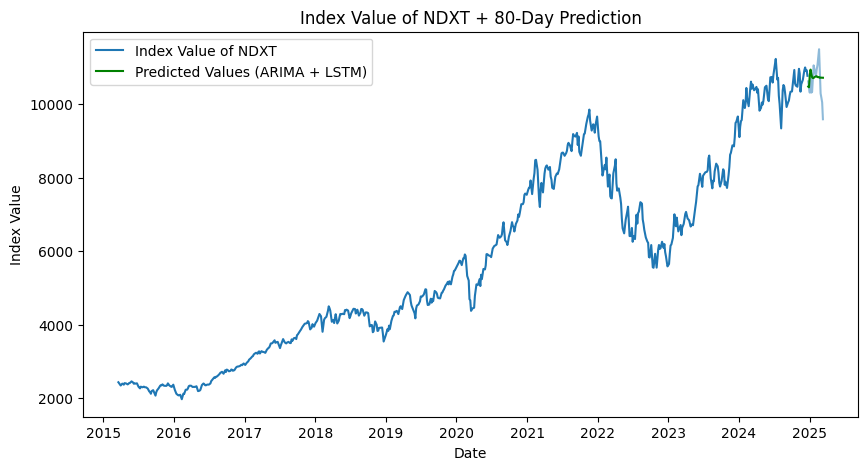

In [185]:
# Plot the predictions
import matplotlib.pyplot as plt

# tValues = np.arange(0, 912, 1)
tValues = dataActualNotResidual['Date'][1:-20]
tValues = pd.to_datetime(tValues)
# tValuesPredict = np.arange(912, 912 + len(future_predictions_original), 1)
date_rng = dataActualNotResidual['Date'][-20:]
tValuesPredict = date_rng
tValuesPredict = pd.to_datetime(tValuesPredict)

plt.figure(figsize=(10, 5))
plt.plot(tValues, dataActualNotResidual['IndexValue_NDXT'][1:-20], label ='Index Value of NDXT', color="tab:blue")
plt.plot(tValuesPredict, dataActualNotResidual['IndexValue_NDXT'][-20:], color="tab:blue", alpha = 0.50)
plt.plot(tValuesPredict, TotalPred_ARIMA_LSTM, label="Predicted Values (ARIMA + LSTM)", color='green')
plt.title("Index Value of NDXT + 80-Day Prediction")
plt.xlabel("Date")
# plt.xlim(2200, 2515+ len(future_predictions_original))
plt.ylabel("Index Value")
plt.legend()
plt.show()


In [187]:
from sklearn.metrics import mean_squared_error

In [188]:
MSE = mean_squared_error(dataActualNotResidual['IndexValue_NDXT'][-20:], TotalPred_ARIMA_LSTM)
print("MSE:", MSE)

MSE: 206668.62702007947
